# Homework & Practice
__Hands-on Task__
- Apply PCA to the Wine Dataset from ScikitLearn
- Analize the explained variance and visualize the results

__Challenge__
- Use PCA to preprocess the dataset before applying a classification model (e.g. Logistic Regression or Random Forest)
- Compare the accuracy before and after PCA

__Extra__
- Try dimensionality reduction on a large dataset from kaggle (e.g. MNIST digits) and visualize the results using t-SNE or PCA

Explained the Variance Ratio:  [0.36198848 0.1920749 ]


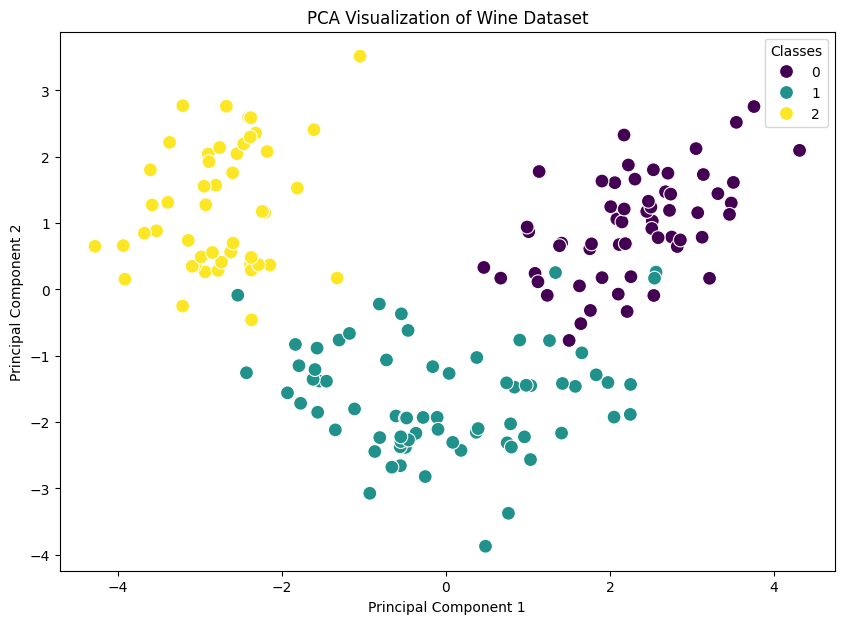

Logistic Regression Accuracy Before PCA: 1.00
Random Forest Accuracy Before PCA: 1.0
Logistic Regression Accuracy Ater PCA: 1.00
Random ForestAccuracy After PCA: 1.00


In [3]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the Wine Dataset
wine = load_wine()
X = wine.data 
y = wine.target

# Standarize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Analize the results
explained_variance = pca.explained_variance_ratio_
print('Explained the Variance Ratio: ', explained_variance)

# Visualize the results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='viridis', s=100)
plt.title('PCA Visualization of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Classes')
plt.show()

# Classification Task: Before PCA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_accuracy_before = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy Before PCA: {lr_accuracy_before:.2f}')

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy_before = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy Before PCA: {rf_accuracy_before}')

# Classification Task: After PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression
lr.fit(X_train_pca, y_train_pca)
y_pred_rf_pca = lr.predict(X_test_pca)
lr_accuracy_after = accuracy_score(y_test_pca, y_pred_rf_pca)
print(f'Logistic Regression Accuracy Ater PCA: {lr_accuracy_after:.2f}')

# Random Forest
rf.fit(X_train_pca, y_train_pca)
y_pred_rf_pca = rf.predict(X_test_pca)
rf_accuracy_after = accuracy_score(y_test_pca, y_pred_rf_pca)
print(f'Random ForestAccuracy After PCA: {rf_accuracy_after:.2f}')

In [4]:
from my_functions import load_kaggle_dataset, clean_up

from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

dataset_name = 'zalando-research/fashionmnist'
extract_path = '../../Kaggle_Datasets/mnist'
csv_name = 'fashion-mnist_train.csv'
df = load_kaggle_dataset(dataset_name, extract_path, csv_name)

mnist = fetch_openml('../../Kaggle_Datasets/mnist/fashion-mnist_train.csv', version=1)
X_mnist, y_mnist = mnist.data, mnist.target.astype(int)

ModuleNotFoundError: No module named 'my_functions'